# Spam Classifier

In [ ]:
# importing the required libraires
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
# loading the data
messages = pd.read_csv("spam.csv", encoding='latin-1') #encoding='ISO-8859-1' can also be used
messages.shape

(5572, 5)

In [135]:
# removing unnecessary columns
messages = messages[["v1", "v2"]]
# changing the column names
cnames = ["class", "sms"]
messages.columns = cnames

In [184]:
print(f'Input data has {len(messages)} rows, {len(messages.columns)} columns')

Input data has 5572 rows, 2 columns


Text(0.5, 1.0, 'number of hams and spams')

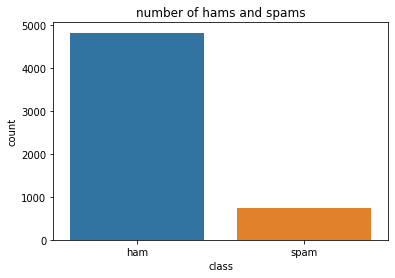

In [167]:
sns.countplot(x = "class", data = messages)
plt.xlabel("class")
plt.title("number of hams and spams")

## Data Cleaning

First goal is to remove all the unnecessary words from the data such as "a", "the", "of", etc because these words are present in large number and don't have any important information. We can use **PorterStemmer** or **Lemmatizer** for that. In this cleaning process we also remove the numbers and lowered all the letters.

In [136]:
#ps = PorterStemmer()
wordnet = WordNetLemmatizer()
corpus = []

for i in range(len(messages)):
    sms = re.sub('[^a-zA-Z]',' ', messages["sms"][i])
    sms = sms.lower()
    sms = sms.split()
    sms = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words("english"))]
    sms = ' '.join(sms)
    corpus.append(sms)

Next step is to make the **vectors** from the text becuase our model cannot accept the string, it need some numbers. We can use **CountVectorizer** from **sklearn** or **Tf-Idf**.

In [137]:
cv = CountVectorizer(max_features=5000)
#cv = TfidfVectorizer(max_features=5000)
# creating a bag of words
X = cv.fit_transform(corpus).toarray()

In [138]:
X.shape

(5572, 5000)

Creating a target variable from the data and replace **ham** by **0** and **spam** by **1**.

In [139]:
# getting the target variable
y = messages["class"]
y = y.replace("ham", 0)
y = y.replace("spam", 1)

## Models

Creating train and test data and fitting the **naive bayes classifier** to classify the spam.

In [188]:
# splitting the train test data and training naive bayes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
classifier = MultinomialNB().fit(X_train, y_train)

In [189]:
y_pred = classifier.predict(X_test)

### Evaluation of Naive Bayes Classifier

In the case of binary classification, **confusion matrix** is better way to evaluate the model.

In [190]:
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

[[939  10]
 [  8 158]]


In [192]:
accuracy = round(accuracy_score(y_test, y_pred),3)
accuracy

0.984

**Accuracy** of Naive Bayes Classifier is about **98.4%**. 

## Random Forest Classifier

In [179]:
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators=100)
classifierRF.fit(X_train, y_train)
y_predRF = classifierRF.predict(X_test)
confusion_matrix(y_test, y_predRF)

array([[948,   1],
       [ 29, 137]], dtype=int64)

In [194]:
round(accuracy_score(y_test, y_predRF),3)

0.973

Accuracy of the **Random Forest Classifier** is **97.3%** which is slightly less than the accuracy of **Naive Bayes Classifier**. We can fine tune the random forest further but naive bayes is working good here. To achieve more accuracy we can use **Recurrent Neural Network**  or **LSTM**.